In [173]:
from IPython import get_ipython
from IPython.display import display
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer


In [174]:
try:
    df_real = pd.read_csv('base_princ_modificado.csv', encoding='utf-8')
    print("CSV lido com sucesso usando encoding='utf-8'")
except UnicodeDecodeError:
    print("Erro ao ler CSV com encoding='utf-8'. Tentando encoding='latin1'.")
    try:
        df_real = pd.read_csv('base_princ_modificado.csv', encoding='latin1')
        print("CSV lido com sucesso usando encoding='latin1'")
    except Exception as e:
        print(f"Erro ao ler CSV com encoding='latin1': {e}")
        exit()
display(df_real.head())


CSV lido com sucesso usando encoding='utf-8'


Idade  Genero  Cor/raca/etnia  PCD  UF  Regiao onde mora  N√≠vel de Ensino  \
0     31       0               1    0  12                 2                5   
1     30       0               1    0   7                 2                2   
2     37       1               0    0  24                 2                2   
3     22       0               6    0  24                 2                1   
4     34       0               1    0  12                 2                5   

   √Årea de forma√ß√£o Situa√ß√£o de trabalho  
0                 0         Empregado(a)  
1                 0         Empregado(a)  
2                 0         Empregado(a)  
3                 0      Desempregado(a)  
4                 1         Empregado(a)

In [175]:
print("\nTipos de dados originais:")
print(df_real.dtypes)

print("\nValores ausentes na coluna 'Regiao onde mora' antes do processamento:")
print(df_real['Regiao onde mora'].isnull().sum())

if 'Regiao onde mora' in df_real.columns:
    df_real['Regiao onde mora'] = df_real['Regiao onde mora'].fillna('Missing Region')
    print("\nValores ausentes preenchidos com 'Missing Region'.")
    print(df_real['Regiao onde mora'].isnull().sum())
    print(df_real['Regiao onde mora'].unique())



Tipos de dados originais:
Idade                    int64
Genero                   int64
Cor/raca/etnia           int64
PCD                      int64
UF                       int64
Regiao onde mora         int64
N√≠vel de Ensino          int64
√Årea de forma√ß√£o         int64
Situa√ß√£o de trabalho    object
dtype: object

Valores ausentes na coluna 'Regiao onde mora' antes do processamento:
0

Valores ausentes preenchidos com 'Missing Region'.
0
[2 1 3 4 0]


In [176]:
colunas_numericas = ['Idade']
colunas_categoricas = ['Regiao onde mora', 'Genero', 'Cor/raca/etnia', 'PCD', 'UF',
                        'N√≠vel de Ensino', '√Årea de forma√ß√£o', 'Situa√ß√£o de trabalho']

colunas_numericas_existentes = [col for col in colunas_numericas if col in df_real.columns]
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in df_real.columns]


In [177]:
transformers_list = []

if colunas_numericas_existentes:
    transformers_list.append(('num', MinMaxScaler(), colunas_numericas_existentes))

if colunas_categoricas_existentes:
    transformers_list.append(('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), colunas_categoricas_existentes))

if transformers_list:
    preprocessor = ColumnTransformer(
        transformers=transformers_list,
        remainder='drop'
    )


In [178]:
df_processed = preprocessor.fit_transform(df_real)
feature_names_processed = preprocessor.get_feature_names_out()
df_processed_df = pd.DataFrame(df_processed, columns=feature_names_processed, index=df_real.index)

display(df_processed_df.head())
print(df_processed_df.dtypes)


num__Idade  cat__Regiao onde mora_0  cat__Regiao onde mora_1  \
0    0.236364                      0.0                      0.0   
1    0.218182                      0.0                      0.0   
2    0.345455                      0.0                      0.0   
3    0.072727                      0.0                      0.0   
4    0.290909                      0.0                      0.0   

   cat__Regiao onde mora_2  cat__Regiao onde mora_3  cat__Regiao onde mora_4  \
0                      1.0                      0.0                      0.0   
1                      1.0                      0.0                      0.0   
2                      1.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   cat__Genero_0  cat__Genero_1  cat__Cor/raca/etnia_0  cat__Cor/raca/etnia_1  \
0            1.0            0.0                    0.0                    1.0   
1            1.0            0.0                    0.0                    1.0   
2            0.0            1.0                    1.0                    0.0   
3            1.0            0.0                    0.0                    0.0   
4            1.0            0.0                    0.0                    1.0   

   ...  cat__√Årea de forma√ß√£o_0  cat__√Årea de forma√ß√£o_1  \
0  ...                      1.0                      0.0   
1  ...                      1.0                      0.0   
2  ...                      1.0                      0.0   
3  ...                      1.0                      0.0   
4  ...                      0.0                      1.0   

   cat__√Årea de forma√ß√£o_2  cat__√Årea de forma√ß√£o_3  cat__√Årea de forma√ß√£o_4  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   cat__√Årea de forma√ß√£o_5  cat__√Årea de forma√ß√£o_7  cat__√Årea de forma√ß√£o_8  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   cat__Situa√ß√£o de trabalho_Desempregado(a)  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        1.0   
4                                        0.0   

   cat__Situa√ß√£o de trabalho_Empregado(a)  
0                                     1.0  
1                                     1.0  
2                                     1.0  
3                                     0.0  
4                                     1.0  

[5 rows x 58 columns]

num__Idade                                   float64
cat__Regiao onde mora_0                      float64
cat__Regiao onde mora_1                      float64
cat__Regiao onde mora_2                      float64
cat__Regiao onde mora_3                      float64
cat__Regiao onde mora_4                      float64
cat__Genero_0                                float64
cat__Genero_1                                float64
cat__Cor/raca/etnia_0                        float64
cat__Cor/raca/etnia_1                        float64
cat__Cor/raca/etnia_2                        float64
cat__Cor/raca/etnia_3                        float64
cat__Cor/raca/etnia_4                        float64
cat__Cor/raca/etnia_5                        float64
cat__Cor/raca/etnia_6                        float64
cat__PCD_0                                   float64
cat__PCD_1                                   float64
cat__UF_1                                    float64
cat__UF_2                                    f

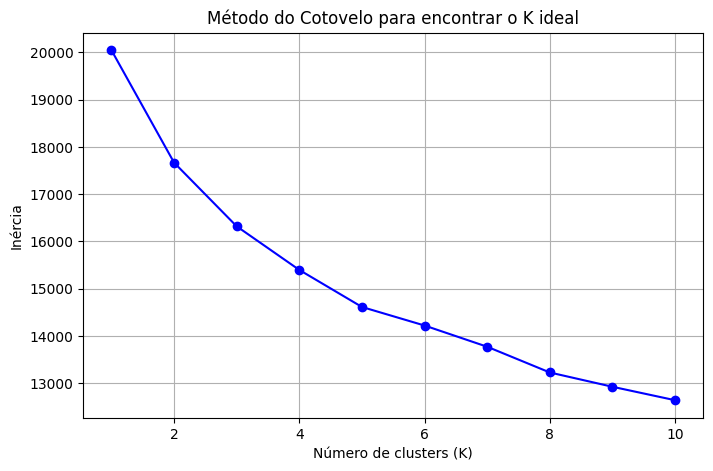

In [179]:
inertia = []
K_range = range(1, 11)

if not df_processed_df.empty and np.issubdtype(df_processed_df.values.dtype, np.number):
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_processed_df)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('N√∫mero de clusters (K)')
    plt.ylabel('In√©rcia')
    plt.title('M√©todo do Cotovelo para encontrar o K ideal')
    plt.grid(True)
    plt.show()


In [180]:
def save_fig_as_png(figure, filename="cotovelo.png"):
    figure.savefig(filename, format='png', bbox_inches='tight')
    print(f"Figura salva como '{filename}'")

save_fig_as_png(plt.gcf(), "metodo_cotovelo.png")


Figura salva como 'metodo_cotovelo.png'


<Figure size 640x480 with 0 Axes>

In [181]:
ideal_k = 4  # Ajuste de acordo com o cotovelo
print(f"\nAplicando K-Means com {ideal_k} clusters.")
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_processed_df)

df_real_com_clusters = df_real.copy()
df_real_com_clusters['cluster'] = clusters

display(df_real_com_clusters[['Idade', 'Regiao onde mora', 'cluster']].head())



Aplicando K-Means com 4 clusters.


Idade  Regiao onde mora  cluster
0     31                 2        2
1     30                 2        2
2     37                 2        3
3     22                 2        2
4     34                 2        2

In [182]:
print(df_real_com_clusters['cluster'].value_counts())

# An√°lise num√©rica
print("\nM√©dia das colunas num√©ricas por cluster:")
if colunas_numericas_existentes:
    print(df_real_com_clusters.groupby('cluster')[colunas_numericas_existentes].mean())

# An√°lise categ√≥rica
for cat_col in colunas_categoricas_existentes:
    if cat_col in df_real_com_clusters.columns:
        print(f"\nDistribui√ß√£o da coluna '{cat_col}' por cluster:")
        display(pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters[cat_col]))


cluster
2    1723
0    1166
1    1152
3    1083
Name: count, dtype: int64

M√©dia das colunas num√©ricas por cluster:
             Idade
cluster           
0        31.960549
1        31.775174
2        32.025537
3        32.031394

Distribui√ß√£o da coluna 'Regiao onde mora' por cluster:


Regiao onde mora   0    1     2    3    4
cluster                                  
0                 29  201     0  807  129
1                 35  257   622  102  136
2                  0    0  1723    0    0
3                 18  147   796   49   73


Distribui√ß√£o da coluna 'Genero' por cluster:


Genero      0     1
cluster            
0         990   176
1        1152     0
2        1723     0
3           0  1083


Distribui√ß√£o da coluna 'Cor/raca/etnia' por cluster:


Cor/raca/etnia   0     1  2  3    4  5    6
cluster                                    
0               14  1122  2  5    0  3   20
1               18     0  3  5  965  9  152
2               69  1541  4  4    0  3  102
3               39   642  3  2  290  6  101


Distribui√ß√£o da coluna 'PCD' por cluster:


PCD         0   1
cluster          
0        1137  29
1        1126  26
2        1699  24
3        1053  30


Distribui√ß√£o da coluna 'UF' por cluster:


UF       1   2   3   4   5   6   7   8   9   10  ...  16  17   18  19   20  \
cluster                                          ...                         
0         8   2  10  44  48  59   0  34   4  25  ...  45  10    0  20  264   
1        15   2  10  71  57  68  42  39  12  14  ...  42  11  135  15   14   
2         0   0   0   0   0   0  44   0   0   0  ...   0   0  190   0    0   
3         8   0   9  40  28  47  20  18   4   6  ...  37   1  107   8   13   

UF       21   23    24  25  26  
cluster                         
0         3  205     0   4   3  
1         1   30   307  11   2  
2         0    0  1235   0   0  
3         3   15   508   7   4  

[4 rows x 25 columns]


Distribui√ß√£o da coluna 'N√≠vel de Ensino' por cluster:


N√≠vel de Ensino   0    1    2    3    4   5
cluster                                    
0                22  160  342  415  174  53
1                23  183  411  381  119  35
2                40  209  642  591  185  56
3                15  114  352  394  148  60


Distribui√ß√£o da coluna '√Årea de forma√ß√£o' por cluster:


√Årea de forma√ß√£o    0    1    2   3    4   5   7   8
cluster                                             
0                 573  207  224  29   65  20  32  16
1                 604  185  220  30   67  16  16  14
2                 845  232  398  41  125  43  22  17
3                 460  166  200  28  103  48  45  33


Distribui√ß√£o da coluna 'Situa√ß√£o de trabalho' por cluster:


Situa√ß√£o de trabalho  Desempregado(a)  Empregado(a)
cluster                                            
0                                  90          1076
1                                 102          1050
2                                 128          1595
3                                 146           937

| Cluster | Nome sugerido                      | Justificativa                                                                     |
| ------- | ---------------------------------- | --------------------------------------------------------------------------------- |
| **0**   | **Mulheres diversas empregadas**   | Majoritariamente mulheres, variadas regi√µes e UFs, bem empregadas.                |
| **1**   | **Mulheres pardas multiestaduais** | 100% mulheres, maioria etnia 4 (parda), distribui√ß√£o em v√°rios estados.           |
| **2**   | **Mulheres brancas concentradas**  | 100% mulheres, maioria branca, todas da mesma regi√£o e UF, maior empregabilidade. |
| **3**   | **Homens diversos e vulner√°veis**  | 100% homens, com maior taxa de desemprego e diversidade √©tnica/regional.          |


üìä Distribui√ß√£o dos clusters (tamanho de cada grupo)
Cluster	Quantidade

2	1723

0	1166

1	1152

3	1083

O cluster 2 √© o maior, e o cluster 3 √© o menor.


üéÇ Idade m√©dia por cluster


Cluster	Idade m√©dia

0	31,96

1	31,77

2	32,03

3	32,03

As idades s√£o muito pr√≥ximas, sem diferen√ßa significativa.

üè° Regi√£o onde mora

Cluster 2: Todos do grupo 2 est√£o na regi√£o 2 (100%). Isso indica que a regi√£o 2 √© fortemente representativa nesse cluster.


Cluster 0: Maioria na regi√£o 3 (807), seguido pela regi√£o 1 (201).


Cluster 1: Distribui√ß√£o mais equilibrada, mas muitos na regi√£o 2 (622) e 1 (257).

Cluster 3: Principalmente na regi√£o 2 (796), seguido pela 1 (147).

üü¢ Conclus√£o: O cluster 2 representa claramente uma popula√ß√£o concentrada geograficamente (regi√£o 2). Os outros clusters s√£o mais mistos, mas a regi√£o 2 ainda √© predominante.

üë§ G√™nero por cluster
Cluster	Feminino (0)	Masculino (1)

0	990	176

1	1152	0

2	1723	0

3	0	1083

üü¢ Conclus√£o:

Clusters 1 e 2 s√£o 100% femininos.

Cluster 3 √© 100% masculino.

Cluster 0 √© majoritariamente feminino, com alguns homens.


üé® Cor/ra√ßa/etnia
Cluster 1: Principalmente da categoria 4 (965 pessoas), o que pode representar, por exemplo, pessoas pardas (dependendo da codifica√ß√£o).

Cluster 2: Predom√≠nio da categoria 1 (1541), talvez brancos.

Cluster 3: Dividido entre categoria 1 (642) e categoria 4 (290).

Cluster 0: Grande concentra√ß√£o na categoria 1 (1122).



üü¢ Conclus√£o: Diferen√ßas raciais entre os clusters, com destaque para:

Cluster 1: maioria de um grupo √©tnico espec√≠fico (categoria 4).

Clusters 0 e 2: maioria na categoria 1.

üßë‚Äçü¶Ω Pessoa com defici√™ncia (PCD)
A porcentagem de PCD √© baixa em todos os clusters (~2%).

üó∫Ô∏è UF (Unidade da Federa√ß√£o)
Cluster 2: quase todos de uma √∫nica UF (c√≥digo 24). Isso pode indicar uma regi√£o muito localizada, como um estado espec√≠fico.

Cluster 1: maior diversidade de UFs.

Cluster 3: bastante variado, mas tamb√©m forte presen√ßa da UF 24 (508 pessoas).

Cluster 0: tamb√©m variado, mas com destaque para UF 20 (264) e 23 (205).

üü¢ Conclus√£o: Cluster 2 √© o mais regionalmente concentrado, os demais s√£o mais distribu√≠dos.

üéì N√≠vel de Ensino
Cluster 2 possui os maiores n√∫meros em todos os n√≠veis, com destaque para:

N√≠vel 2 a 4 (provavelmente ensino m√©dio completo at√© superior em andamento).

üìö √Årea de forma√ß√£o
Cluster 2 tem os maiores n√∫meros nas √°reas 0 (845), 2 (398) e 4 (125).

üü¢ Conclus√£o: Pessoas do cluster 2 s√£o mais concentradas em determinadas √°reas de forma√ß√£o, com prov√°vel √™nfase t√©cnica ou de base mais ampla.

üíº Situa√ß√£o de trabalho
Cluster	Desempregados	Empregados
0	90	1076
1	102	1050
2	128	1595
3	146	937

üü¢ Conclus√£o:

O cluster 2 possui o maior n√∫mero absoluto de pessoas empregadas.

O cluster 3 tem a maior taxa proporcional de desemprego (146 de 1083).

üß† Resumo dos Perfis por Cluster

Cluster	Perfil Resumido

0	Majoritariamente feminino, regi√£o variada (3 e 1), maioria branca, alta escolaridade, bem empregada.

1	100% feminino, mais racialmente diverso (categoria 4), ampla distribui√ß√£o regional, empregadas.

2	100% feminino, todos da mesma regi√£o e UF (extrema homogeneidade), maioria branca, maior empregabilidade.

3	100% masculino, maioria branca ou parda, maior taxa de desemprego, variedade regional.



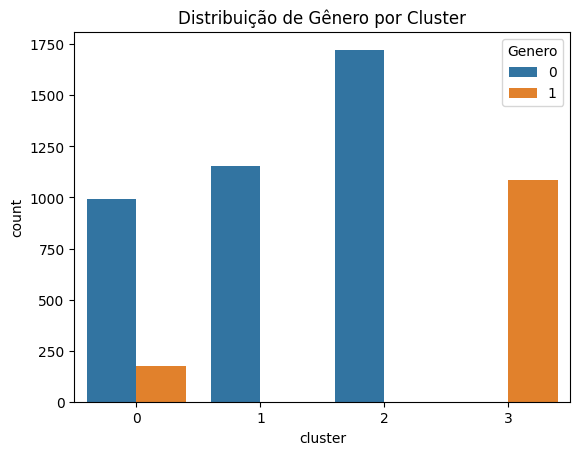

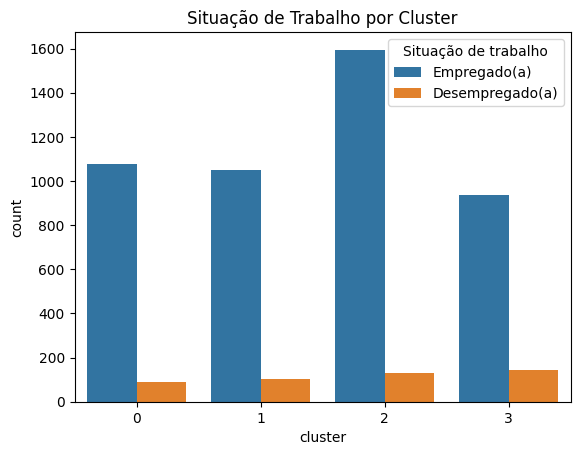

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# G√™nero por cluster
# Use df_real_com_clusters which contains the 'cluster' column
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Genero')
plt.title("Distribui√ß√£o de G√™nero por Cluster")
plt.show()

# Situa√ß√£o de trabalho por cluster
# Use df_real_com_clusters which contains the 'cluster' column
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Situa√ß√£o de trabalho')
plt.title("Situa√ß√£o de Trabalho por Cluster")
plt.show()


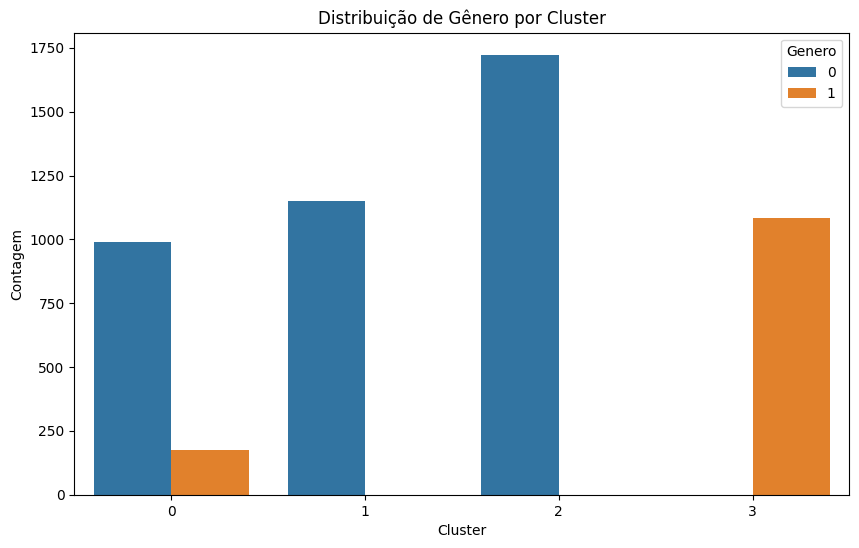

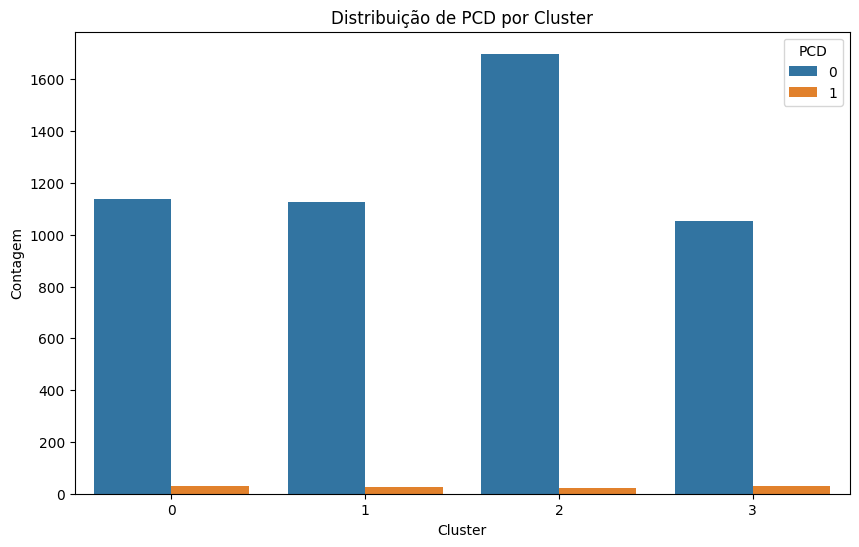

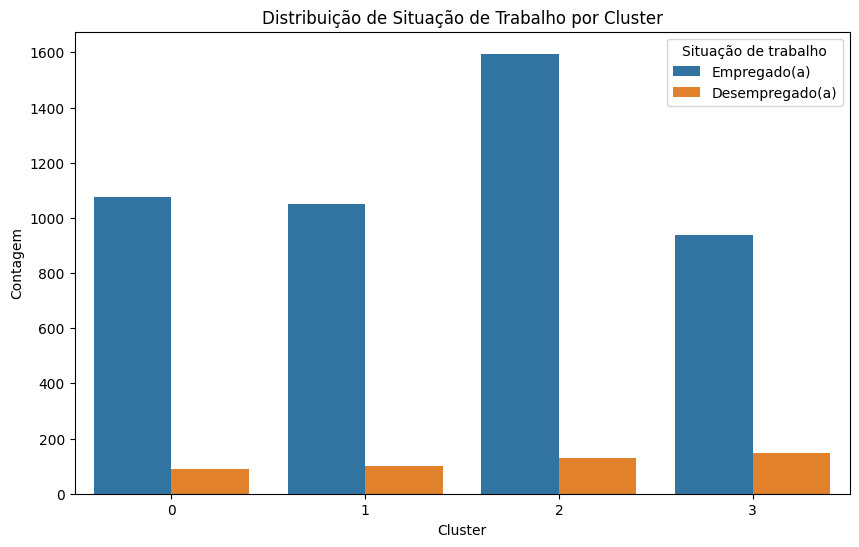

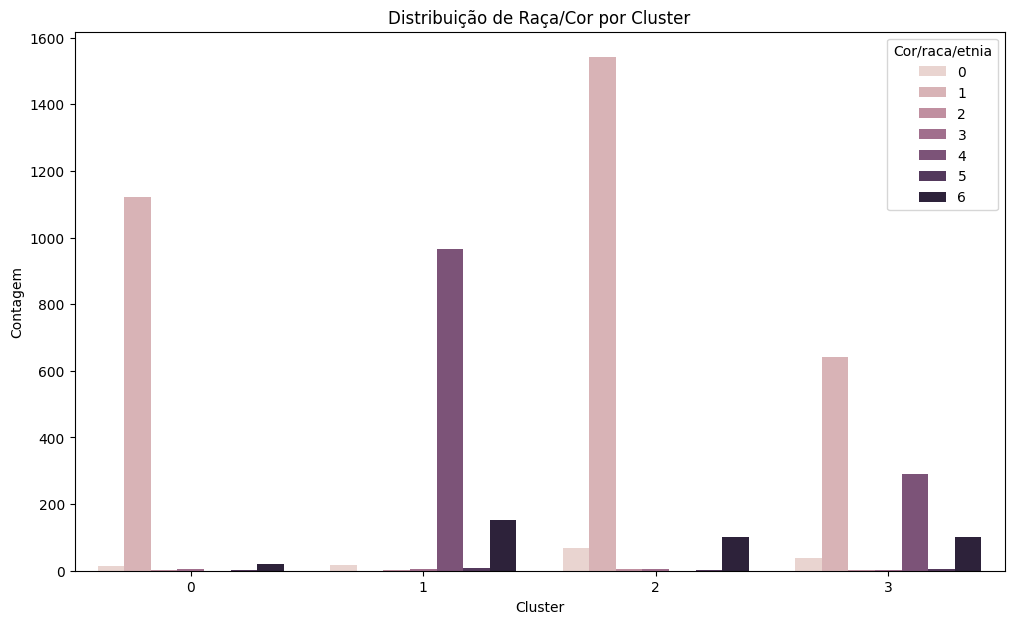

In [188]:
# prompt: gere gr√°fico de barras agrupadas por cluster, G√™nero, PCD, Situa√ß√£o de trabalho, Ra√ßa/cor.

# Gr√°fico de barras agrupadas por cluster, G√™nero
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Genero')
plt.title("Distribui√ß√£o de G√™nero por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gr√°fico de barras agrupadas por cluster, PCD
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='PCD')
plt.title("Distribui√ß√£o de PCD por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gr√°fico de barras agrupadas por cluster, Situa√ß√£o de trabalho
plt.figure(figsize=(10, 6))
sns.countplot(data=df_real_com_clusters, x='cluster', hue='Situa√ß√£o de trabalho')
plt.title("Distribui√ß√£o de Situa√ß√£o de Trabalho por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()

# Gr√°fico de barras agrupadas por cluster, Ra√ßa/cor
# Assuming 'Cor/raca/etnia' is the correct column name for Ra√ßa/cor
if 'Cor/raca/etnia' in df_real_com_clusters.columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df_real_com_clusters, x='cluster', hue='Cor/raca/etnia')
    plt.title("Distribui√ß√£o de Ra√ßa/Cor por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Contagem")
    plt.show()
else:
    print("Coluna 'Cor/raca/etnia' n√£o encontrada no DataFrame.")

<Figure size 1500x800 with 0 Axes>

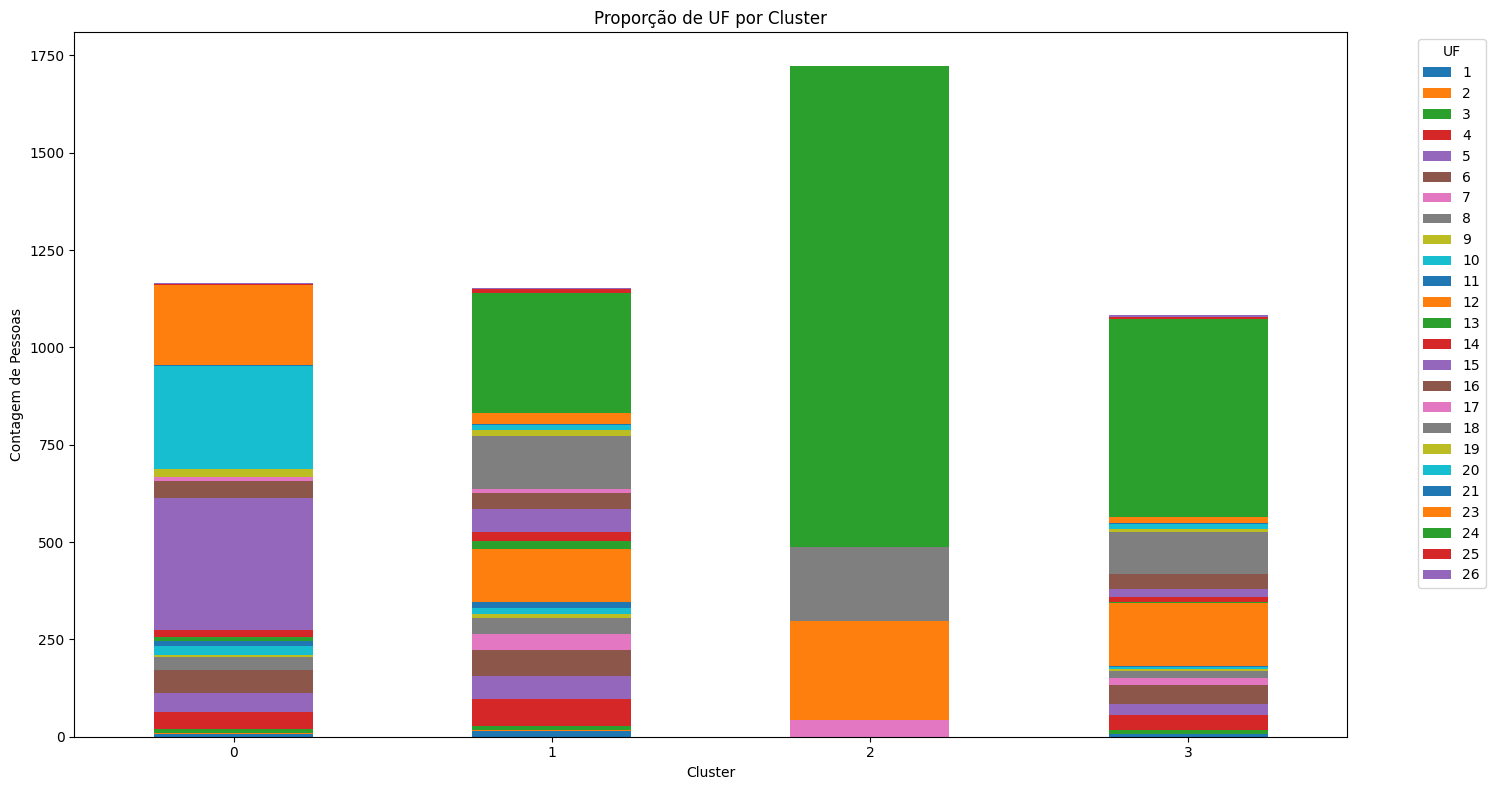

In [189]:
# prompt: gere um grafico Gr√°fico de pizza (ou barras empilhadas): Propor√ß√£o de UF por cluster (mostrando concentra√ß√£o geogr√°fica).

# Gere os dados para o gr√°fico de propor√ß√£o de UF por cluster
if 'UF' in df_real_com_clusters.columns:
  uf_cluster_counts = df_real_com_clusters.groupby(['cluster', 'UF']).size().unstack(fill_value=0)

  # Gere o gr√°fico de barras empilhadas
  plt.figure(figsize=(15, 8))
  uf_cluster_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
  plt.title('Propor√ß√£o de UF por Cluster')
  plt.xlabel('Cluster')
  plt.ylabel('Contagem de Pessoas')
  plt.xticks(rotation=0)
  plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()
else:
  print("Coluna 'UF' n√£o encontrada no DataFrame.")

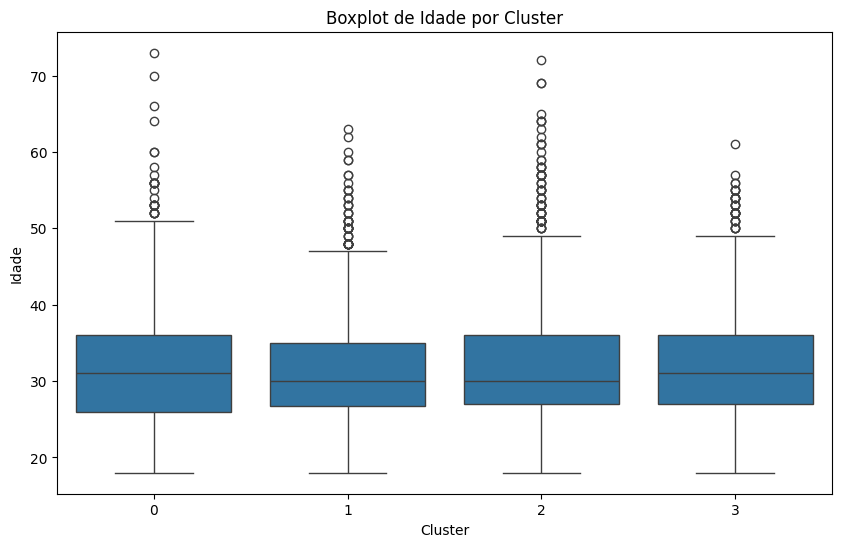

In [190]:
# prompt: gere um grafico de Boxplot de idade por cluster:
# Ver varia√ß√µes de distribui√ß√£o, mesmo que m√©dias estejam pr√≥ximas.

# Boxplot de Idade por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_real_com_clusters, x='cluster', y='Idade')
plt.title("Boxplot de Idade por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Idade")
plt.show()

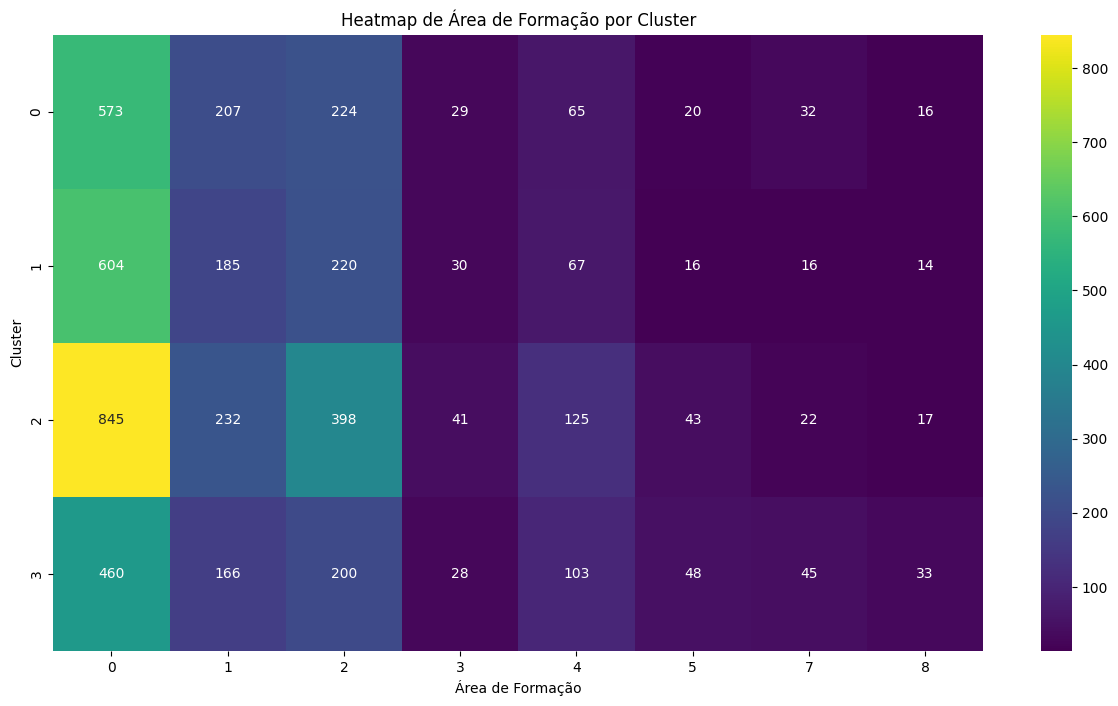

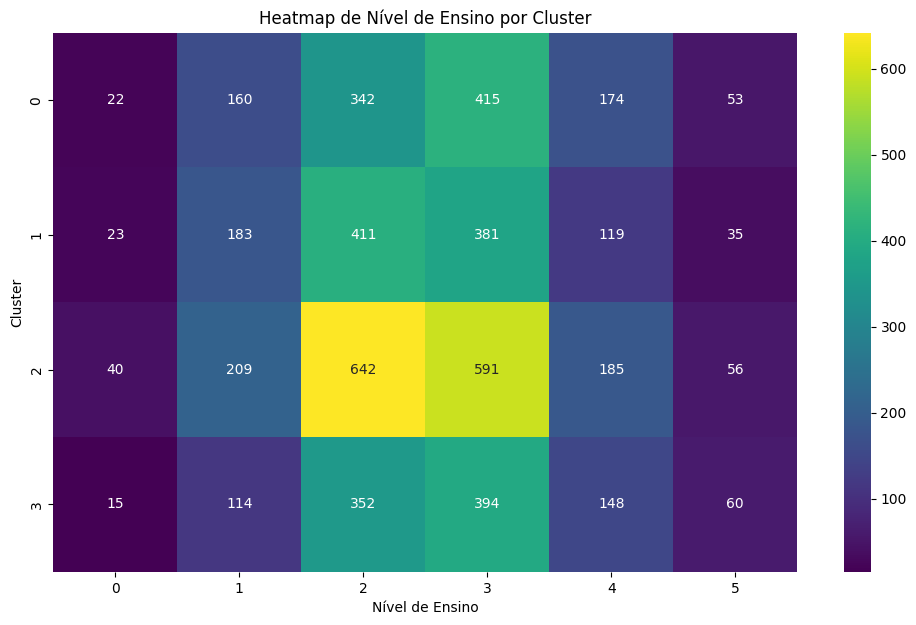

In [191]:
# prompt: gere um grafico de Mapa de calor (heatmap) para ‚Äú√Årea de forma√ß√£o‚Äù ou ‚ÄúN√≠vel de Ensino‚Äù por cluster:
# Para enxergar padr√µes mais visuais de distribui√ß√£o.
# Exemplo: sns.heatmap(pivot_table, annot=True)

# Gerar dados para o heatmap de √Årea de Forma√ß√£o por Cluster
if '√Årea de forma√ß√£o' in df_real_com_clusters.columns:
    area_formacao_cluster = pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters['√Årea de forma√ß√£o'])

    # Gerar o heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(area_formacao_cluster, annot=True, fmt='d', cmap='viridis')
    plt.title('Heatmap de √Årea de Forma√ß√£o por Cluster')
    plt.xlabel('√Årea de Forma√ß√£o')
    plt.ylabel('Cluster')
    plt.show()
else:
    print("Coluna '√Årea de forma√ß√£o' n√£o encontrada no DataFrame.")


# Gerar dados para o heatmap de N√≠vel de Ensino por Cluster
if 'N√≠vel de Ensino' in df_real_com_clusters.columns:
    nivel_ensino_cluster = pd.crosstab(df_real_com_clusters['cluster'], df_real_com_clusters['N√≠vel de Ensino'])

    # Gerar o heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(nivel_ensino_cluster, annot=True, fmt='d', cmap='viridis')
    plt.title('Heatmap de N√≠vel de Ensino por Cluster')
    plt.xlabel('N√≠vel de Ensino')
    plt.ylabel('Cluster')
    plt.show()
else:
    print("Coluna 'N√≠vel de Ensino' n√£o encontrada no DataFrame.")

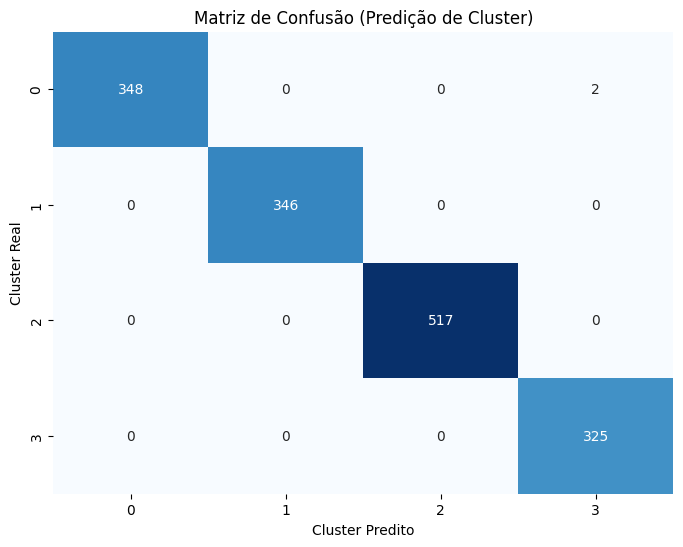


Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       350
           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       517
           3       0.99      1.00      1.00       325

    accuracy                           1.00      1538
   macro avg       1.00      1.00      1.00      1538
weighted avg       1.00      1.00      1.00      1538



In [193]:
# prompt: gere a matriz de confus√£o

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'cluster' is your target variable and you want to predict it
# based on the processed features. This is just an example.
# A more typical scenario would be to have a ground truth label for
# the confusion matrix, which is not present in this clustering context.

# If you want to build a classifier to predict the cluster based on features:
# First, split data into training and testing sets
X = df_processed_df
y = clusters # The clusters found by K-Means are used as "labels"

# Check if there's enough data for splitting and if there are multiple classes
if len(X) > 10 and len(np.unique(y)) > 1: # Basic check for valid data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train a simple classifier (e.g., Logistic Regression)
    model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confus√£o (Predi√ß√£o de Cluster)')
    plt.xlabel('Cluster Predito')
    plt.ylabel('Cluster Real')
    plt.show()

    # Generate and print classification report
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))

else:
    print("\nDados insuficientes ou apenas um cluster para gerar a matriz de confus√£o.")
    print("A matriz de confus√£o √© tipicamente usada para avaliar um classificador com r√≥tulos de verdade.")
    print("Neste contexto de clustering, os 'r√≥tulos' s√£o os clusters encontrados pelo K-Means.")
    print("Geramos uma matriz de confus√£o aqui como um exemplo de como um modelo pode prever os clusters.")
